# Scikit-learn-Knn

### Knn: Is a nonparametric (does not fit the bellcurve) method used for classification and regression. This distance based model uses the user defined K to classify or predict.

### Knn Example: User sets K = 3 then based upon the distance measurement the model will output the most frequent classification or average the top three as the output.

In [1]:
from IPython.display import Image
from sklearn import neighbors
import pandas as pd
import math
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



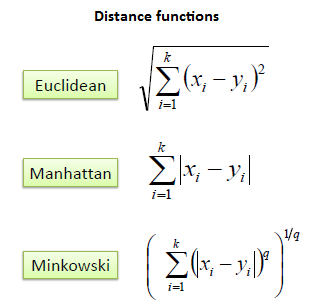

In [2]:
Image(filename='F:\\Data\\Mini Data Requests\\KNN_similarity.png')

In [3]:
Iris = pd.read_csv('R:\\Data\\cs\\Advanced Metering\\CHM\\PsuedoDataForCode\\Iris.csv')
print(Iris.head(5))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
X = Iris.head(1)
print(X)

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa


In [5]:
Iris['EuclideanDistance'] = ''

for i in range(0,len(Iris)):
    Iris['EuclideanDistance'][i] =  (X.values[0,0] - Iris.values[i,0])**2 + (X.values[0,1] - Iris.values[i,1])**2 + (X.values[0,2] - Iris.values[i,2])**2 + (X.values[0,3] - Iris.values[i,3])**2

C:\Users\w47593\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
Iris['ManhattanDistance'] = ''
# Math.Fabs = Absoulute value
for i in range(0,len(Iris)):
    Iris['ManhattanDistance'][i] =  math.fabs((X.values[0,0] - Iris.values[i,0])) + math.fabs((X.values[0,1] - Iris.values[i,1])) + math.fabs((X.values[0,2] - Iris.values[i,2])) + math.fabs((X.values[0,3] - Iris.values[i,3]))


C:\Users\w47593\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Minkowski distance is a littler different where q = 1 is for a city block, q = 2 is for euclidean distance

In [7]:
Iris = Iris.sort(['EuclideanDistance'], ascending=[True])
print(Iris.head(10))


    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species EuclideanDistance ManhattanDistance
0            5.1          3.5           1.4          0.2  setosa                 0                 0
17           5.1          3.5           1.4          0.3  setosa              0.01               0.1
4            5.0          3.6           1.4          0.2  setosa              0.02               0.2
39           5.1          3.4           1.5          0.2  setosa              0.02               0.2
27           5.2          3.5           1.5          0.2  setosa              0.02               0.2
28           5.2          3.4           1.4          0.2  setosa              0.02               0.2
40           5.0          3.5           1.3          0.3  setosa              0.03               0.3
7            5.0          3.4           1.5          0.2  setosa              0.03               0.3
49           5.0          3.3           1.4          0.2  setosa              0.05         

# Using Scikit-learn-Knn For Classification

In [8]:
# Read in File
Iris = pd.read_csv('R:\\Data\\cs\\Advanced Metering\\CHM\\PsuedoDataForCode\\Iris.csv')

# Set Features
X = Iris[Iris.columns[0:4]]

# Convert to factor and retrieve Class name
Y, _ = pd.factorize(Iris['Species'])
ClassNames = pd.factorize(Iris['Species'])



In [9]:
# KNN Model
knn = neighbors.KNeighborsClassifier()
knn.fit(X, Y)

# Append and Predict Data
rows_list = [] 
for x in range(0, 150):
    #print(knn.predict(X.iloc[x]))
    rows_list.append(ClassNames[1][knn.predict(X.iloc[x])])



In [10]:
# Convert rows_list to DataFrame    
df = pd.DataFrame(rows_list) 
df =df.reset_index()
df.columns = ['index', 'PredictedValue']

# Merge Data and Pred Data Together
Iris =Iris.reset_index()
merged = Iris.merge(df,on='index') 



In [11]:
# Confusion Matrix 
pd.crosstab(merged.Species, merged.PredictedValue).apply(lambda r: r/r.sum(), axis=1)


PredictedValue,setosa,versicolor,virginica
Species,,,
setosa,1,0.00,0.00
versicolor,0,0.94,0.06
virginica,0,0.04,0.96
